In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
sns.set(style="whitegrid")


In [23]:
data = pd.read_csv(r"C:\Users\dhrit\Downloads\Iris (1).csv")
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [24]:
features = data.select_dtypes(include=['float64', 'int64'])
print("\nFeature columns used for clustering:")
print(features.head())


Feature columns used for clustering:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2


In [25]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)


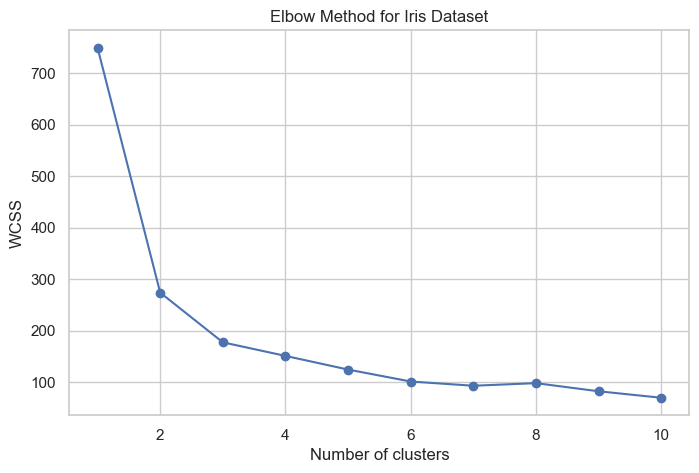

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters
print("\nDataset with cluster labels:")
print(data.head())



Dataset with cluster labels:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


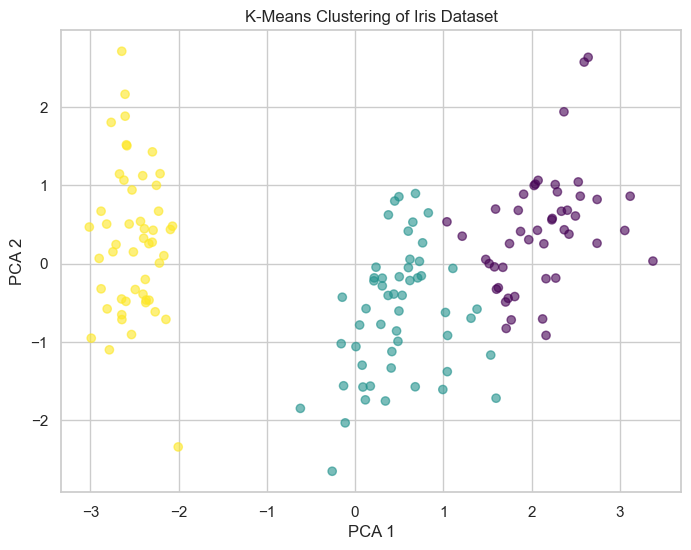

In [29]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()